## Project

we will examine the stock price of Microsoft Corporation (MSFT) as reported by the National Association of Securities Dealers Automated Quotations (NASDAQ)

MSFT’s stocks are listed on NASDAQ and their value is updated every working day of the stock market. It should be noted that the market does not allow trading on Saturdays and Sundays, therefore there is a gap between the two dates. The Opening Value of the stock, the Highest and Lowest values of that stock on the same days, as well as the Closing Value at the end of the day, are all indicated for each date.

In [1]:
# importing Libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam 
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
#read data
df=pd.read_csv('Data/MSFT.csv',na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061491,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063687,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064785,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063138,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062040,47894400


## EDA

In [3]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,False,False,False,False,False,False
1986-03-14,False,False,False,False,False,False
1986-03-17,False,False,False,False,False,False
1986-03-18,False,False,False,False,False,False
1986-03-19,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-09-13,False,False,False,False,False,False
2021-09-14,False,False,False,False,False,False
2021-09-15,False,False,False,False,False,False


In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape:", df.shape)


Dataframe Shape: (8953, 6)


In [5]:
print("Null Value Present:", df.isnull().values.any())

Null Value Present: False


## Plot of the True Adjusted Close Value

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

<AxesSubplot:xlabel='Date'>

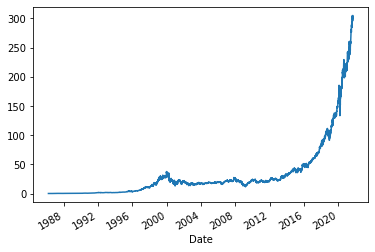

In [6]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

Setting the Target Variable and Selecting the Features

In [7]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

#scaling

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased. Also, because the data is not spread out in huge values, we can achieve greater precision by scaling down. To perform this we will be using the MinMaxScaler class of the sci-kit-learn library.

In [8]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000031,0.000000,1.000000
1986-03-14,0.000028,0.000034,0.000029,0.297096
1986-03-17,0.000040,0.000037,0.000040,0.127119
1986-03-18,0.000046,0.000037,0.000035,0.063588
1986-03-19,0.000037,0.000028,0.000029,0.044285


In [9]:
#Creating a Training Set and a Test Set for Stock Market Prediction

The Machine Learning LSTM model will be trained on the data in the training set and tested for accuracy and backpropagation on the test set.

In [10]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

## Building the LSTM Model for Stock Market Prediction

In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

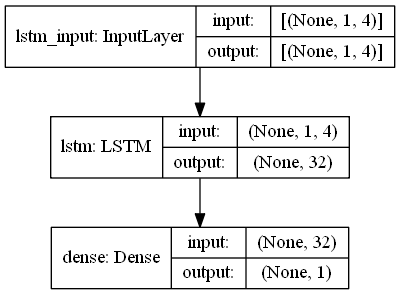

In [12]:
#Building the LSTM Model

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [13]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1018/1018 [==============================] - 6s 3ms/step - loss: 20.8536
Epoch 2/100
1018/1018 [==============================] - 2s 2ms/step - loss: 323.2813
Epoch 3/100
1018/1018 [==============================] - 2s 2ms/step - loss: 212.0999
Epoch 4/100
1018/1018 [==============================] - 2s 2ms/step - loss: 123.9998
Epoch 5/100
1018/1018 [==============================] - 2s 2ms/step - loss: 66.1812
Epoch 6/100
1018/1018 [==============================] - 2s 2ms/step - loss: 27.6136
Epoch 7/100
1018/1018 [==============================] - 2s 2ms/step - loss: 9.5505
Epoch 8/100
1018/1018 [==============================] - 2s 2ms/step - loss: 3.9265
Epoch 9/100
1018/1018 [==============================] - 2s 2ms/step - loss: 2.2148
Epoch 10/100
1018/1018 [==============================] - 2s 2ms/step - loss: 1.5088
Epoch 11/100
1018/1018 [==============================] - 2s 2ms/step - loss: 1.1586
Epoch 12/100
1018/1018 [==============================] - 2s 2ms/

1018/1018 [==============================] - 2s 2ms/step - loss: 0.8076
Epoch 98/100
1018/1018 [==============================] - 2s 2ms/step - loss: 0.8074
Epoch 99/100
1018/1018 [==============================] - 2s 2ms/step - loss: 0.8073
Epoch 100/100
1018/1018 [==============================] - 2s 2ms/step - loss: 0.8071


In [14]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

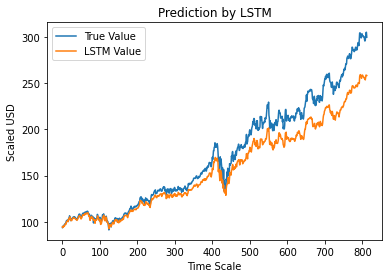

In [15]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()